In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [4]:
df.shape

(645, 8)

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [12]:
df['Sqft'].value_counts().head(15)

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
889.500     10
1423.200    10
1487.244    10
1245.300     9
1352.040     9
1779.000     8
1067.400     8
1889.298     7
640.440      7
1515.708     6
Name: Sqft, dtype: int64

In [32]:
df['Price'].value_counts().head(15)


45000     47
55000     29
36000     25
50000     22
100000    17
60000     16
65000     16
40000     15
35000     15
80000     15
43000     15
75000     14
70000     13
42000     13
48000     12
Name: Price, dtype: int64

In [42]:
df = df.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

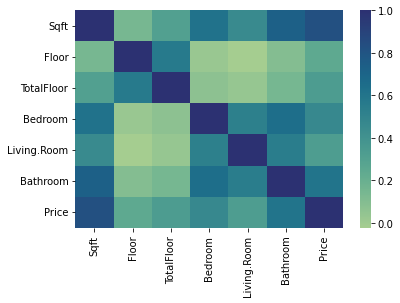

In [43]:
sns.heatmap(df.corr(), cmap='crest')


c:\Users\User\anaconda3\files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

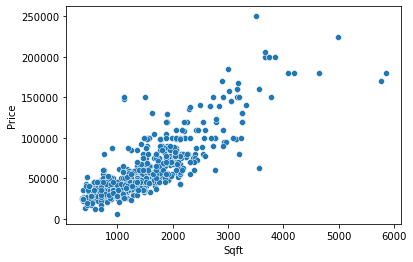

In [44]:
sns.scatterplot(df['Sqft'],df['Price'])

In [45]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [46]:
cols = ['Sqft', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']
new_df = df[cols]

In [52]:
new_df.head()

,Sqft,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,2,2,62000
1,2134.800,4,2,2,78000
2,1138.560,2,2,1,58000
3,1458.780,3,2,2,45000
4,967.776,3,2,2,45000


<AxesSubplot:>

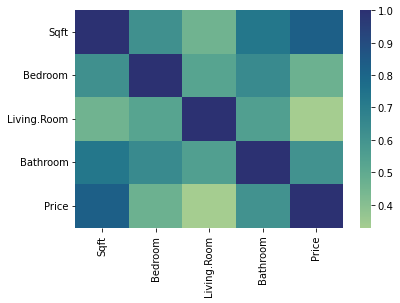

In [51]:
sns.heatmap(new_df.corr(), cmap='crest')

In [53]:
from sklearn.cluster import KMeans

In [57]:
klist = []

for i in range(1,7):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(new_df)
    klist.append(model.inertia_)

c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

In [58]:
klist

[818168895093.1039,
 280633030634.023,
 127250641849.5947,
 80767203513.23466,
 54475717148.69736,
 36746669638.49069]

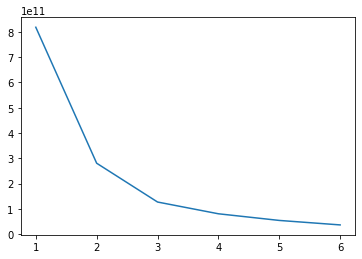

In [59]:
plt.plot(range(1,7), klist)
plt.show()

As we can see from the elbow plot, 3 is the best value

In [ ]:
# Number of clusters = 3

In [60]:
import plotly.express as px

In [62]:
px.scatter(new_df,x='Sqft',y='Price', )

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

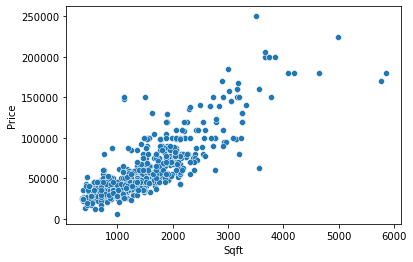

In [69]:


sns.scatterplot(data = new_df,x='Sqft',y='Price')


In [61]:
# new_df.head()

,Sqft,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,2,2,62000
1,2134.800,4,2,2,78000
2,1138.560,2,2,1,58000
3,1458.780,3,2,2,45000
4,967.776,3,2,2,45000


In [81]:
final_model= KMeans(n_clusters= 3, random_state=0)
final_model.fit(new_df)

new_df['data_label']= final_model.labels_

c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\User\AppData\Local\Temp\ipykernel_7400\370900276.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
px.scatter(new_df,x='Sqft',y='Price', color='data_label')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

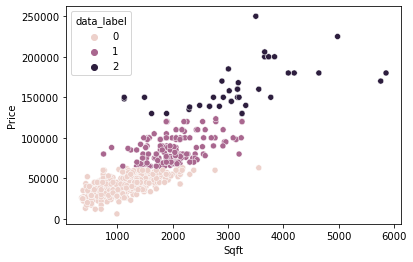

In [83]:
sns.scatterplot(data=new_df, x=new_df['Sqft'],y=new_df['Price'], hue=new_df['data_label'])